<a href="https://colab.research.google.com/github/Malope-cmd/Malope-cmd/blob/main/KPI%26ABSA_Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: ApplianceWorld

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* The spreadsheet provided consisted of multiple sheets,
* Casing it as a dataframe only grant access to the first sheet
* Create a separate pd dataframe for each
* Easier access and mergeability


In [ ]:
# Each dataframe is a separate sheet from the excel workbook
appdata = pd.read_excel('AppliancesData.xlsx')
monthdata = pd.read_excel("MonthsData.xlsx")
salesdata = pd.read_excel("SalesData.xlsx")
empdata = pd.read_excel("SalespeopleData.xlsx")
terrdata = pd.read_excel("TerritoryData.xlsx")
empgendata = pd.read_excel("WorkersGenderData.xlsx")

In [ ]:
salesdata.head()

,ID,Year,Year-Month,Month No,SalesPersonID,Revenue,UNITS SOLD,Cost of Sales,Productcode
0,1,2023,202301,1,1,505.0,2,383.80,193905
1,2,2023,202301,1,1,505.0,6,565.60,193827
2,3,2023,202301,1,1,505.0,4,516.11,193837
3,4,2023,202301,1,1,505.0,4,921.12,193862
4,5,2023,202301,1,1,505.0,4,933.24,193871


In [ ]:
data = salesdata.copy()
dataterr = terrdata.copy()
dataempg = empgendata.copy()
dataemp = empdata.copy()
datamonths = monthdata.copy()
dataapps = appdata.copy()

# Create copies of the original data to avoid data losses
# Original copies can be accessed any point

In [ ]:
data['Gross revenue'] = data['Revenue']-data["Cost of Sales"]

In [ ]:
data = data.merge(dataapps, on='Codeprod')

In [ ]:
dataempterr = dataemp.merge(dataterr, on='Territory')

In [ ]:
dataempterr = dataempterr.merge(dataempg, on='Sales Person')

In [ ]:
data = data.merge(dataempterr, on='SalesPersonID')

In [ ]:
data = data.merge(datamonths, on='Month No')

In [ ]:
data_df = data.copy()
# Dataframe to be used for performing analyses
# Further manipulations can still be done to data

In [ ]:
data_df.describe(include=['object', 'category'])

,Appliance,Brand,Sales Person,Territory,Region,State,Gender,Month
count,40393,40393,40393,40393,40393,40393,40393,40393
unique,17,3,576,66,5,43,2,12
top,Dishwasher,Samsung,Louie Ted,01BD0404,Northeast,Florida,F,February
freq,6789,20291,100,1156,12985,3179,21662,3608


In [ ]:
data_df.describe()

,ID,Codeprod,Year-Month,Month No,SalesPersonID,Revenue,UNITS SOLD,Cost of Sales,Year,Gross revenue
count,40393.000000,40393.000000,40393.000000,40393.000000,40393.000000,40393.000000,40393.000000,40393.000000,40393.000000,40393.000000
mean,20197.007724,193858.778922,202357.300844,6.428292,287.323274,1193.177256,3.919763,752.121473,2023.508727,441.055783
std,11660.598982,36.028941,50.177380,3.493254,166.034334,1219.095360,4.483859,810.829564,0.499930,512.541504
min,1.000000,193815.000000,202301.000000,1.000000,1.000000,505.000000,2.000000,133.320000,2023.000000,-3979.400000
25%,10099.000000,193828.000000,202306.000000,3.000000,143.000000,672.000000,2.000000,405.328000,2023.000000,220.320000
50%,20197.000000,193839.000000,202401.000000,6.000000,287.000000,888.800000,2.000000,564.960000,2024.000000,330.400000
75%,30295.000000,193894.000000,202407.000000,9.000000,430.000000,1306.800000,4.000000,841.500000,2024.000000,508.200000
max,40393.000000,193923.000000,202412.000000,12.000000,576.000000,76034.200000,112.000000,51703.256000,2024.000000,26183.520000


In [ ]:
data_df.head()

,ID,Codeprod,Year-Month,Month No,SalesPersonID,Revenue,UNITS SOLD,Cost of Sales,Year,Gross revenue,Appliance,Brand,Sales Person,Territory,Region,State,Gender,Month
0,1,193905,202301,1,1,505.0,2,383.80,2023,121.20,Vacuum Cleaner,LG,Rothbart Stephen Tobias,01BD0101,Northeast,Value not found,F,January
1,2,193827,202301,1,1,505.0,6,565.60,2023,-60.60,Dishwasher,Samsung,Rothbart Stephen Tobias,01BD0101,Northeast,Value not found,F,January
2,3,193837,202301,1,1,505.0,4,516.11,2023,-11.11,Blender,Samsung,Rothbart Stephen Tobias,01BD0101,Northeast,Value not found,F,January
3,4,193862,202301,1,1,505.0,4,921.12,2023,-416.12,Air Fryer,Whirlpool,Rothbart Stephen Tobias,01BD0101,Northeast,Value not found,F,January
4,5,193871,202301,1,1,505.0,4,933.24,2023,-428.24,Food Processor,Whirlpool,Rothbart Stephen Tobias,01BD0101,Northeast,Value not found,F,January


In [ ]:
data_df.to_excel('MergedData.xlsx', index=False)

# Question 1
* Revenue by region and top employees.
* For 2023 Quarter 1


In [ ]:
# Separating data from the three four months -Quater 1- of 2023

q1_202301_df = data_df[data_df['Year-Month'] == 202301]
q1_202302_df = data_df[data_df['Year-Month'] == 202302]
q1_202303_df = data_df[data_df['Year-Month'] == 202303]

In [ ]:
q1_2023 = pd.concat([q1_202301_df, q1_202302_df], ignore_index=True)

In [ ]:
q1_2023 = pd.concat([q1_2023, q1_202303_df], ignore_index=True)
# This dataframe only has data from Quarter 1 of 2023

In [ ]:
q1_2023.tail()

,ID,Codeprod,Year-Month,Month No,SalesPersonID,Revenue,UNITS SOLD,Cost of Sales,Year,Gross revenue,Appliance,Brand,Sales Person,Territory,Region,State,Gender,Month
5389,32391,193923,202303,3,460,6386.0,6,4470.20,2023,1915.80,Electric Grill,LG,Bou-Harb Talal J,01BD0608,North Central,Ohio,M,March
5390,18824,193917,202303,3,267,8034.0,16,2651.22,2023,5382.78,Slow Cooker,LG,Schwartz Brian Mitchell,01BD0405,Southeast,Florida,M,March
5391,11346,193923,202303,3,162,9579.0,14,5268.45,2023,4310.55,Electric Grill,LG,Pina Desiderio,01BD0303,Northeast,Virginia,M,March
5392,10571,193828,202303,3,151,10609.0,47,8168.93,2023,2440.07,Dishwasher,Samsung,North James Michael,01BD0302,Northeast,Virginia,F,March
5393,13532,193917,202303,3,193,14832.0,14,4597.92,2023,10234.08,Slow Cooker,LG,Garalnick Susan,01BD0306,Southeast,North Carolina,F,March


In [ ]:
q1_2023.describe(include=['object', 'category'])

,Appliance,Brand,Sales Person,Territory,Region,State,Gender,Month
count,6985,6985,6985,6985,6985,6985,6985,6985
unique,17,3,576,66,5,43,2,4
top,Dishwasher,Samsung,Winig Paul Ira,01BD0404,Northeast,Florida,F,February
freq,1203,3547,24,202,2263,589,3723,1972


In [ ]:
reven_total = q1_2023['Revenue'].sum()
costs = q1_2023['Cost of Sales'].sum()
profit = reven_total - costs

print(f'Total Revenue: {reven_total}')
print(f'Cost of sales: {costs}')
print(f'Profit: {profit}')

Total Revenue: 5110296.0
Cost of sales: 3419531.75
Profit: 1690764.25


In [ ]:
regional_rev = q1_2023.groupby('Region')[['Revenue', 'Gross revenue']].sum().reset_index()

In [ ]:
reg = regional_rev['Region']
rev = regional_rev['Revenue']
g_rev = regional_rev['Gross revenue']

x = np.arange(len(reg)) # array for regions names
width = 0.35   # the width of the bars

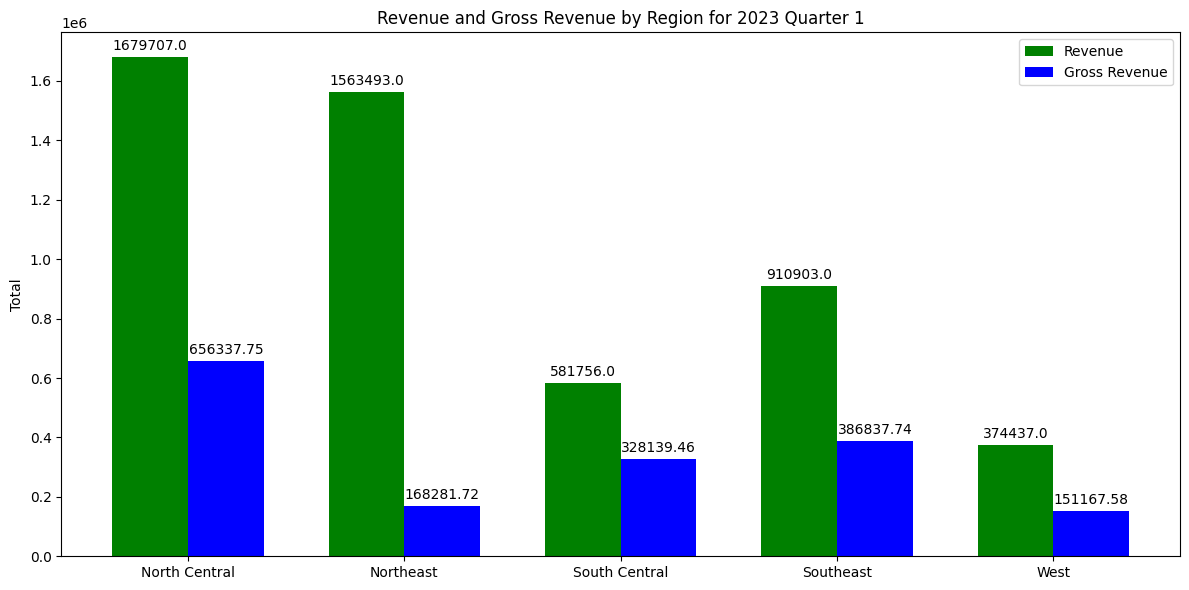

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(x - width/2, rev, width, label='Revenue', color='green')
rects2 = ax.bar(x + width/2, g_rev, width, label='Gross Revenue', color='blue')

ax.set_ylabel('Total')
ax.set_title('Revenue and Gross Revenue by Region for 2023 Quarter 1')
ax.set_xticks(x)
ax.set_xticklabels(reg)
ax.legend()

# Generated by AI
# Only adds the revenue figure to the plot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


fig.tight_layout()
plt.show()

# Gross Revenue is under $1 million for almost all regions.
* The two top performing regions have disproportional cost
leading to large reduction in revenue. If optimized to be cost effective, the Northern regions can generate significant amount of gross revenue.
* Not includig gross income would give biased ideas about Northern and Eastern regions.

In [ ]:
top_emp = q1_2023.groupby('Sales Person')['Revenue'].sum().reset_index()

top_emp = top_emp.sort_values(by=['Revenue'], ascending=False)
top_n_emp = top_emp.head(15)

In [ ]:
total_revenue = q1_2023.groupby('Revenue').sum()

print(total_revenue)

NameError: name 'q1_2023' is not defined

<ipython-input-19-31260ea0f5db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Person', y='Revenue', data= top_n_emp, palette='viridis', color='red')


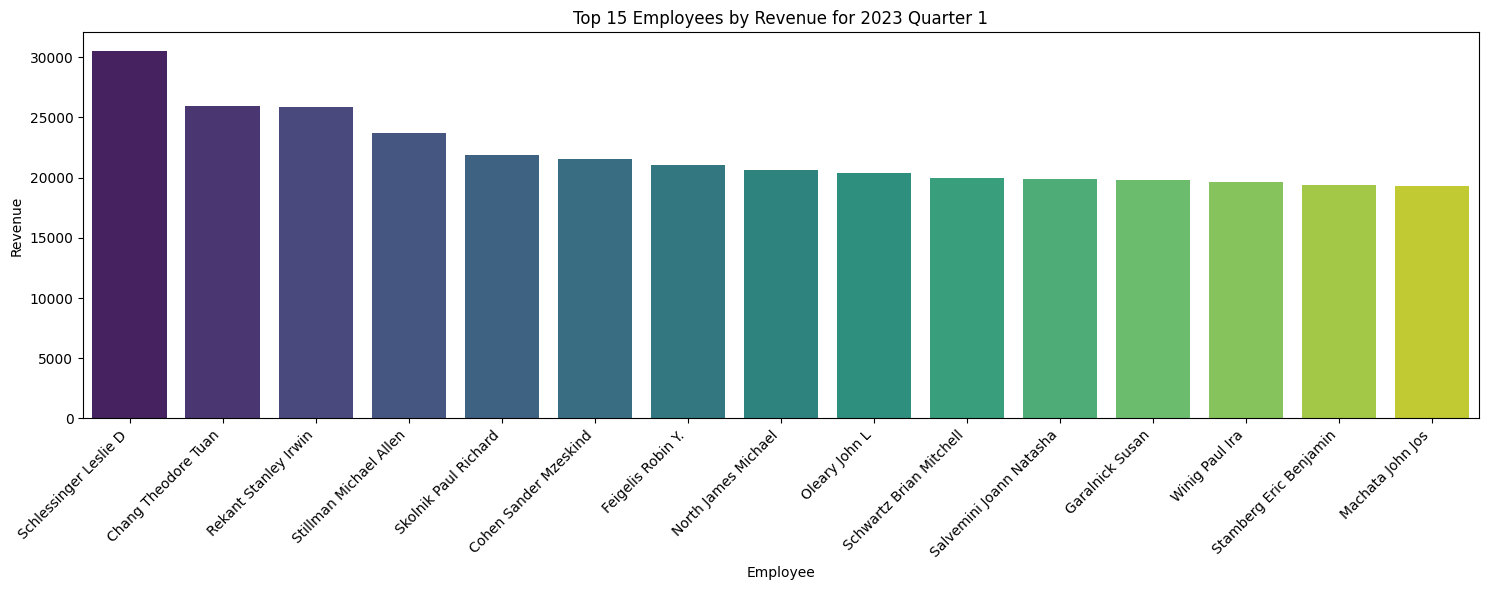

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Sales Person', y='Revenue', data= top_n_emp, palette='viridis', color='red')

plt.title('Top 15 Employees by Revenue for 2023 Quarter 1')
plt.ylabel('Revenue')
plt.xlabel('Employee')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_empc = q1_2023.groupby('State')['Revenue'].sum().reset_index()

top_empc = top_empc.sort_values(by=['Revenue'], ascending=False)
top_n_empc = top_empc.head(15)

<ipython-input-21-3a87555b6d0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Revenue', data= top_n_empc, palette='viridis', color='red')


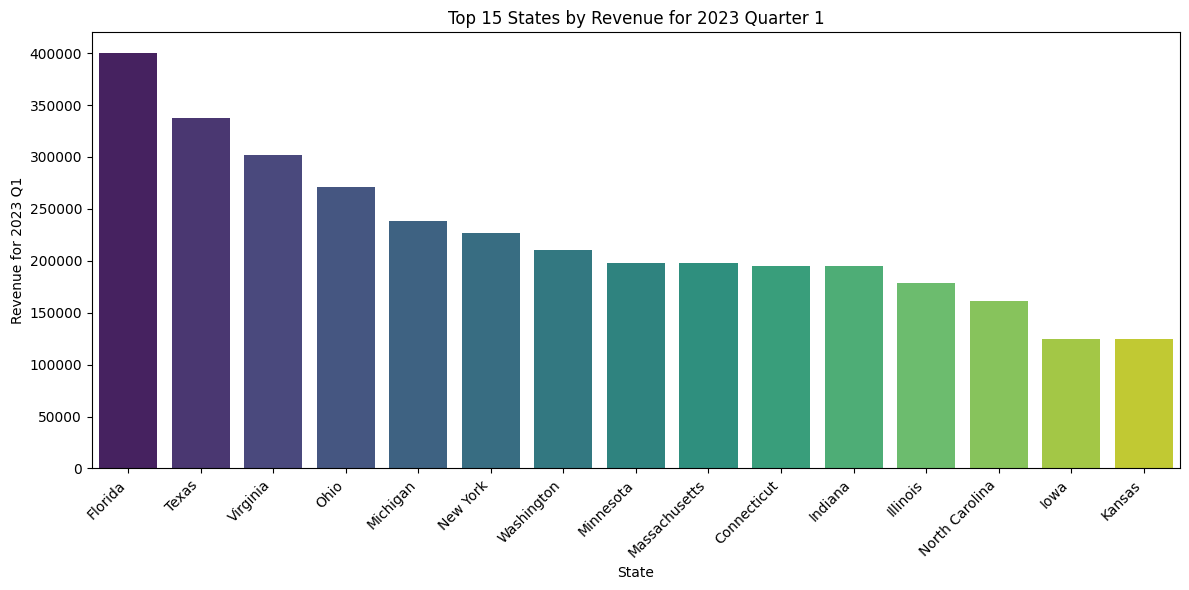

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Revenue', data= top_n_empc, palette='viridis', color='red')

plt.title('Top 15 States by Revenue for 2023 Quarter 1')
plt.ylabel('Revenue for 2023 Q1')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Question 2
* Top 5 best selling products by Revenue (7 Gross revenue)
* For each year 2023 and 2024

In [ ]:
data_2023 = data_df[data_df['Year'] == 2023 ]
data_2024 = data_df[data_df['Year'] == 2024]

In [ ]:
comb_rev = data_df.groupby('Appliance')['Revenue'].sum().reset_index()
comb_rev = comb_rev.sort_values(by=['Revenue'], ascending=False)

<ipython-input-24-ca1c21a55354>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Appliance', data=comb_rev, palette='viridis', orient='h')  # orient='h' for horizontal


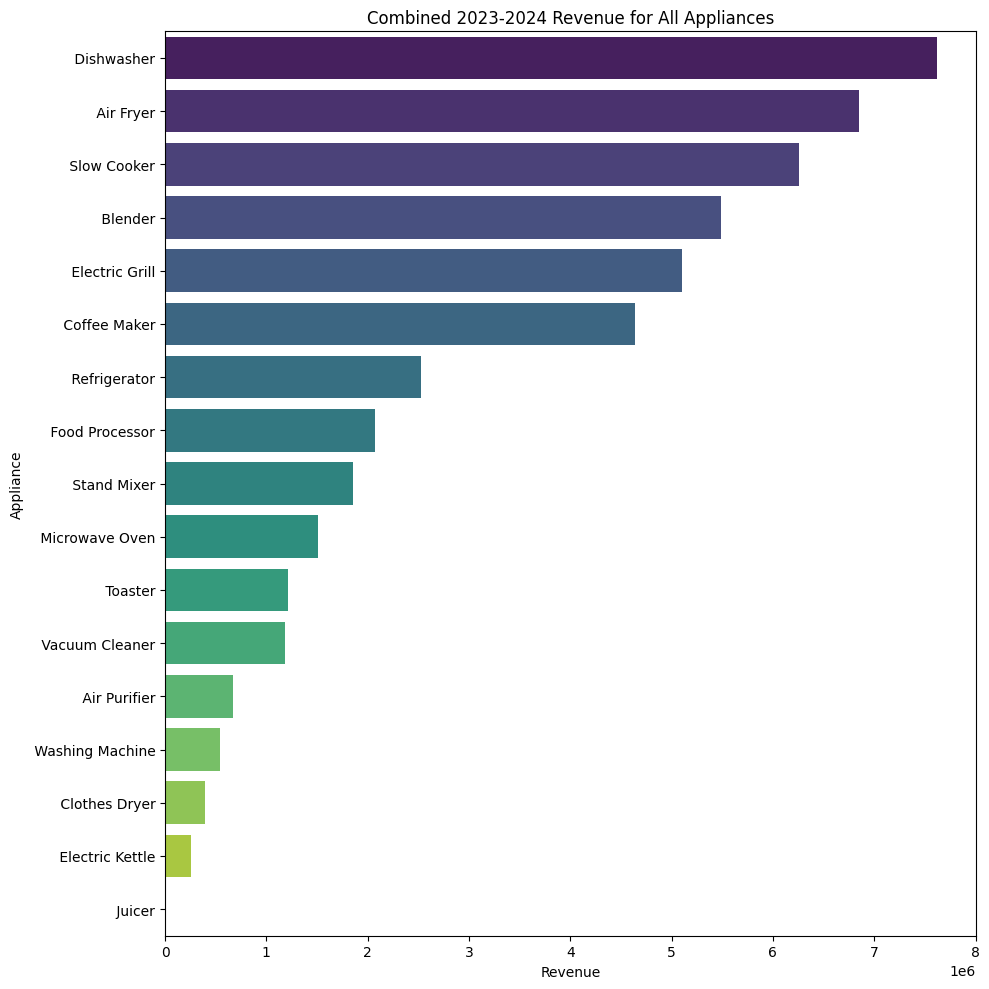

In [ ]:
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
sns.barplot(x='Revenue', y='Appliance', data=comb_rev, palette='viridis', orient='h')  # orient='h' for horizontal
plt.title('Combined 2023-2024 Revenue for All Appliances')
plt.xlabel('Revenue')
plt.ylabel('Appliance')
plt.tight_layout()
plt.show()

In [ ]:
total_revenue = data_df.groupby('Appliance')['Revenue'].sum().reset_index()

# Sort by revenue in descending order and get top 8
top_8_appliances = total_revenue.sort_values(by=['Revenue'], ascending=False).head(8)['Appliance'].tolist()

# Filter data_df for top 8 appliances
filtered_data = data_df[data_df['Appliance'].isin(top_8_appliances)]

In [ ]:
revenue_by_year = filtered_data.groupby(['Appliance', 'Year'])['Revenue'].sum().reset_index()

In [ ]:
# Pivot the table to have years as columns
revenue_pivot = revenue_by_year.pivot(index='Appliance', columns='Year', values='Revenue').reset_index()

revenue_pivot = revenue_pivot.rename(columns={2023: 'Revenue_2023', 2024: 'Revenue_2024'})

final_data = pd.merge(revenue_pivot, total_revenue, on='Appliance')

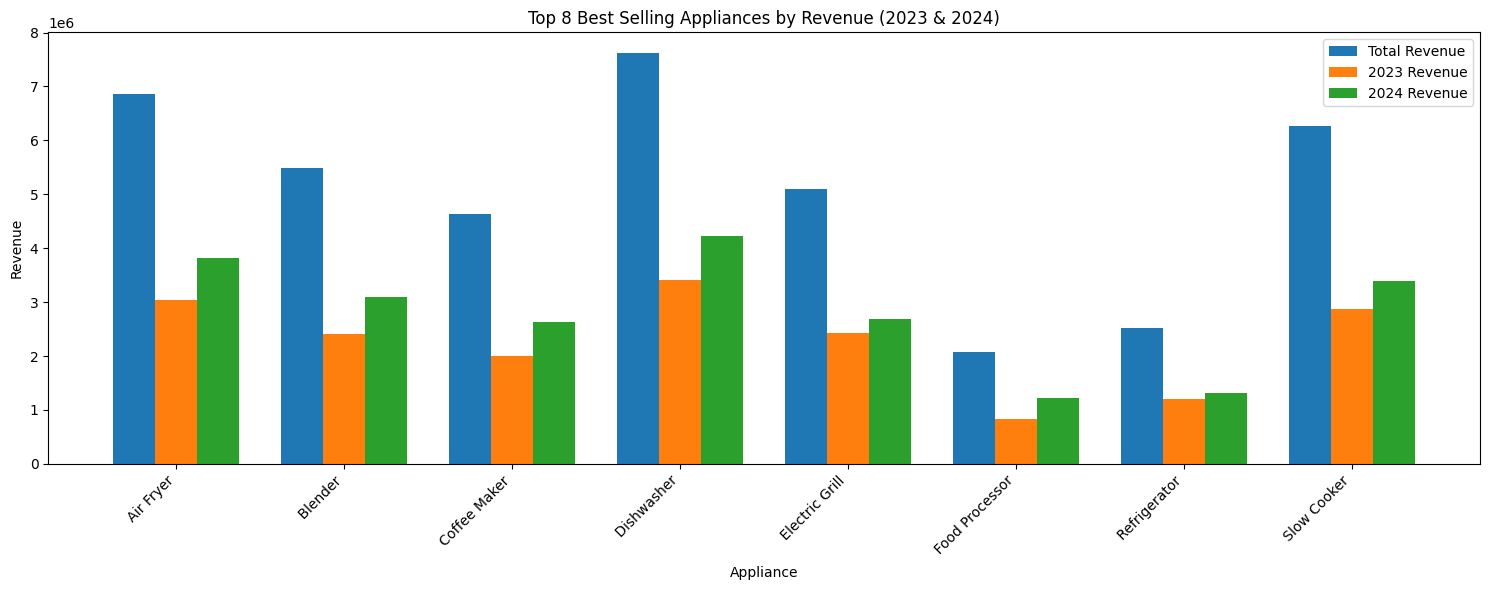

In [ ]:

fig, ax = plt.subplots(figsize=(15, 6))

# Define bar width and positions
bar_width = 0.25
x_pos = np.arange(len(final_data['Appliance']))

ax.bar(x_pos - bar_width, final_data['Revenue'], width=bar_width, label='Total Revenue')
ax.bar(x_pos, final_data['Revenue_2023'], width=bar_width, label='2023 Revenue')
ax.bar(x_pos + bar_width, final_data['Revenue_2024'], width=bar_width, label='2024 Revenue')

ax.set_title('Top 8 Best Selling Appliances by Revenue (2023 & 2024)')
ax.set_xlabel('Appliance')
ax.set_ylabel('Revenue')
ax.set_xticks(x_pos)
ax.set_xticklabels(final_data['Appliance'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
## The first diagram for 2023
prods_23 = data_2023.groupby('Appliance')[['Revenue']].sum().reset_index()
prods_23 = prods_23.sort_values(by=['Revenue'], ascending=False)
prods_2023 = prods_23.head(10)

## The second diagram for 2024
prods_24 = data_2024.groupby('Appliance')[['Revenue']].sum().reset_index()
prods_24 = prods_24.sort_values(by=['Revenue'], ascending=False)
prods_2310 = prods_24.head(10)

<ipython-input-30-d3203ee6eb1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Appliance', y='Revenue', data= prods_2023, palette='viridis')


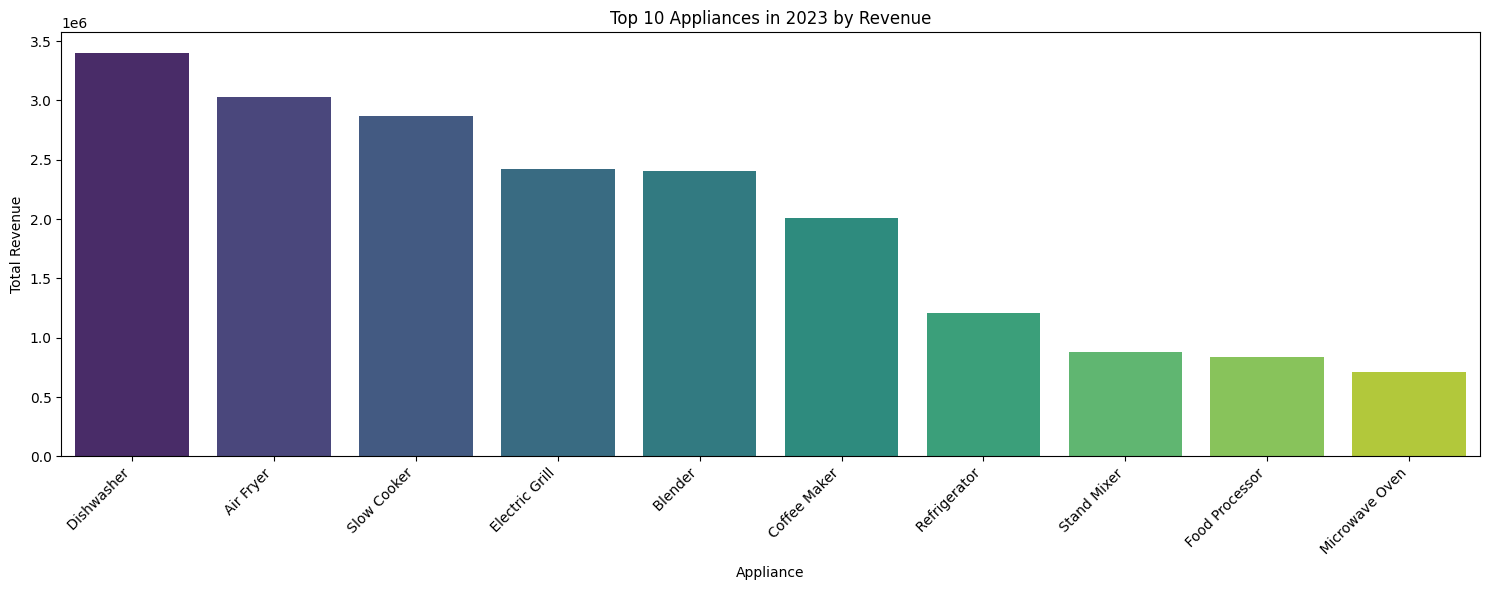

In [ ]:
plt.figure(figsize=(15,6))

sns.barplot(x='Appliance', y='Revenue', data= prods_2023, palette='viridis')

plt.title('Top 10 Appliances in 2023 by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Appliance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-28-e17c51b2b4b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Appliance', y='Revenue', data= prods_2310, palette='viridis')


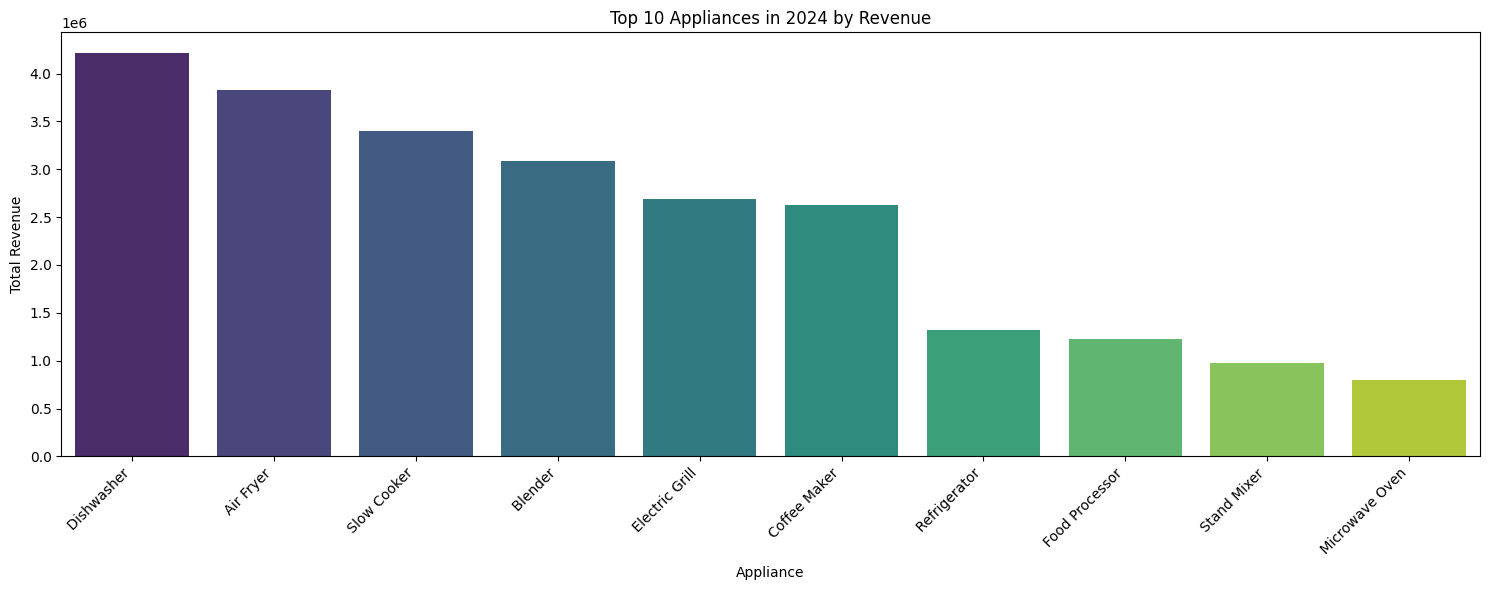

In [ ]:
plt.figure(figsize=(15,6))

sns.barplot(x='Appliance', y='Revenue', data= prods_2310, palette='viridis')

plt.title('Top 10 Appliances in 2024 by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Appliance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Question 3
 * States with highest annual revenue growth
 * Growth both as a difference and as a percentage change

In [ ]:
# Calculating the revenue in each year

rev_2023 = data_2023.groupby('State')['Revenue'].sum().reset_index()
rev_2024 = data_2024.groupby('State')['Revenue'].sum().reset_index()

In [ ]:
revenue_change = pd.merge(rev_2023, rev_2024, on='State', suffixes=('_2023', '_2024'))

In [ ]:
# Add column with revenue change as difference in revenue between the two years 2023 and 2024

revenue_change['Revenue Change'] = revenue_change['Revenue_2024'] - revenue_change['Revenue_2023']

In [ ]:
top_10_st = revenue_change[revenue_change['Revenue Change'] > 0].sort_values(by=['Revenue Change'], ascending=False).head(10)

<ipython-input-33-2759300cd399>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Revenue Change', data=top_10_st, palette='viridis')


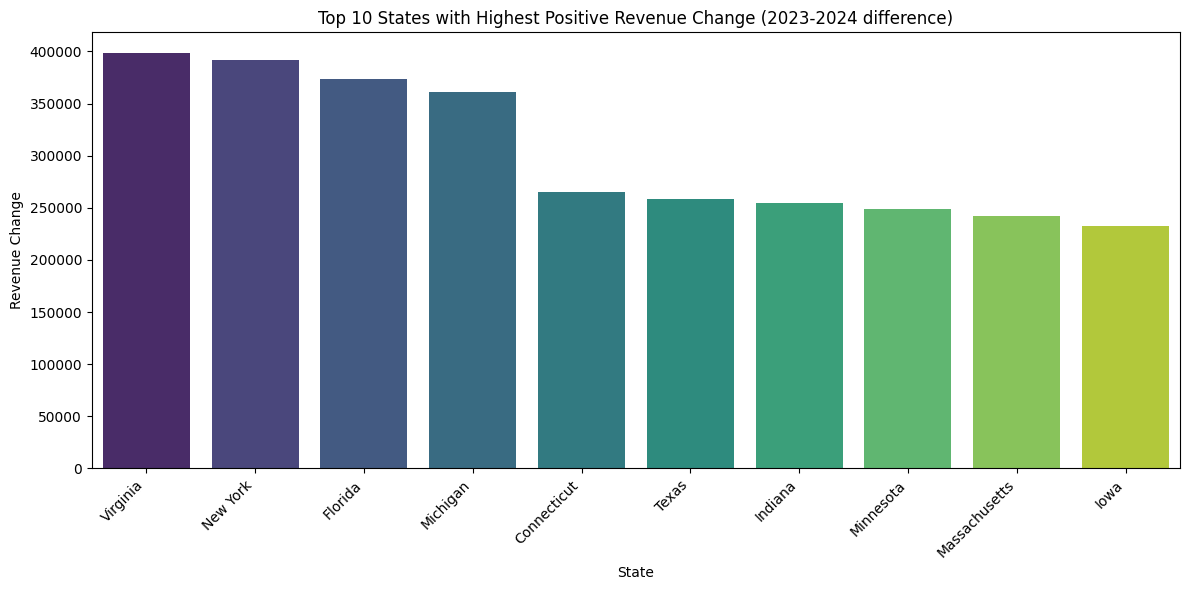

In [ ]:

plt.figure(figsize=(12, 6))

sns.barplot(x='State', y='Revenue Change', data=top_10_st, palette='viridis')

plt.title('Top 10 States with Highest Positive Revenue Change (2023-2024 difference)')
plt.xlabel('State')
plt.ylabel('Revenue Change')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
revenue_change['Revenue_changep'] = revenue_change['Revenue Change'] / revenue_change['Revenue_2023']

In [ ]:
top_10_st_p = revenue_change[revenue_change['Revenue_changep'] > 0].sort_values(by=['Revenue_changep'], ascending=False).head(10)

<ipython-input-38-3f9f7c144432>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Revenue_changep', data=top_10_st_p, palette='viridis')


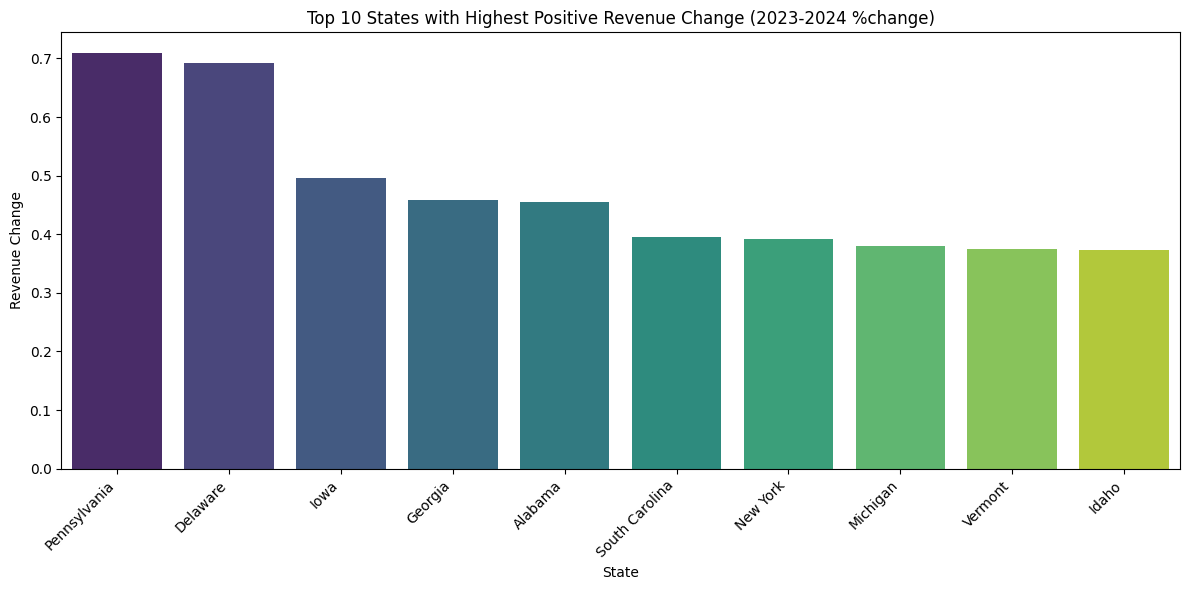

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x='State', y='Revenue_changep', data=top_10_st_p, palette='viridis')
plt.title('Top 10 States with Highest Positive Revenue Change (2023-2024 %change)')
plt.xlabel('State')
plt.ylabel('Revenue Change')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Question 4
* Top salespeople from states with greatest year-on-year income growth
* Based on profit/gross income

In [ ]:
# Data from 2024 with only the three top states
top_states = ['Virginia', 'New York', 'Florida']
data_2024_ts = data_2024[data_2024['State'].isin(top_states)]

In [ ]:
top_workers_rev = data_2024_ts.groupby('Sales Person')['Gross revenue'].sum().reset_index()

top_workers_a = top_workers_rev.sort_values(by=['Gross revenue'], ascending=False).head(8)

<ipython-input-26-f59c0cbebd9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Person', y="Gross revenue", data= top_workers_a, palette='viridis')


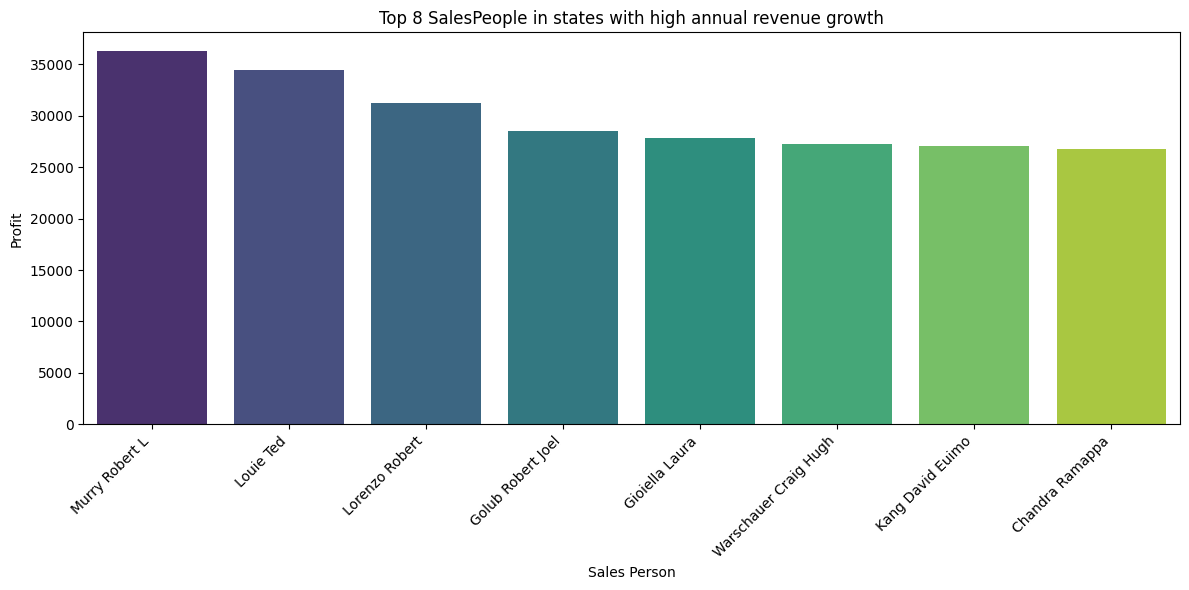

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Sales Person', y="Gross revenue", data= top_workers_a, palette='viridis')

plt.title('Top 8 SalesPeople in states with high annual revenue growth')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-49-184ce6189938>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_by_state = state_salesp_gross.groupby('State').apply(lambda x: x.nlargest(5, 'Gross revenue')).reset_index(drop=True)


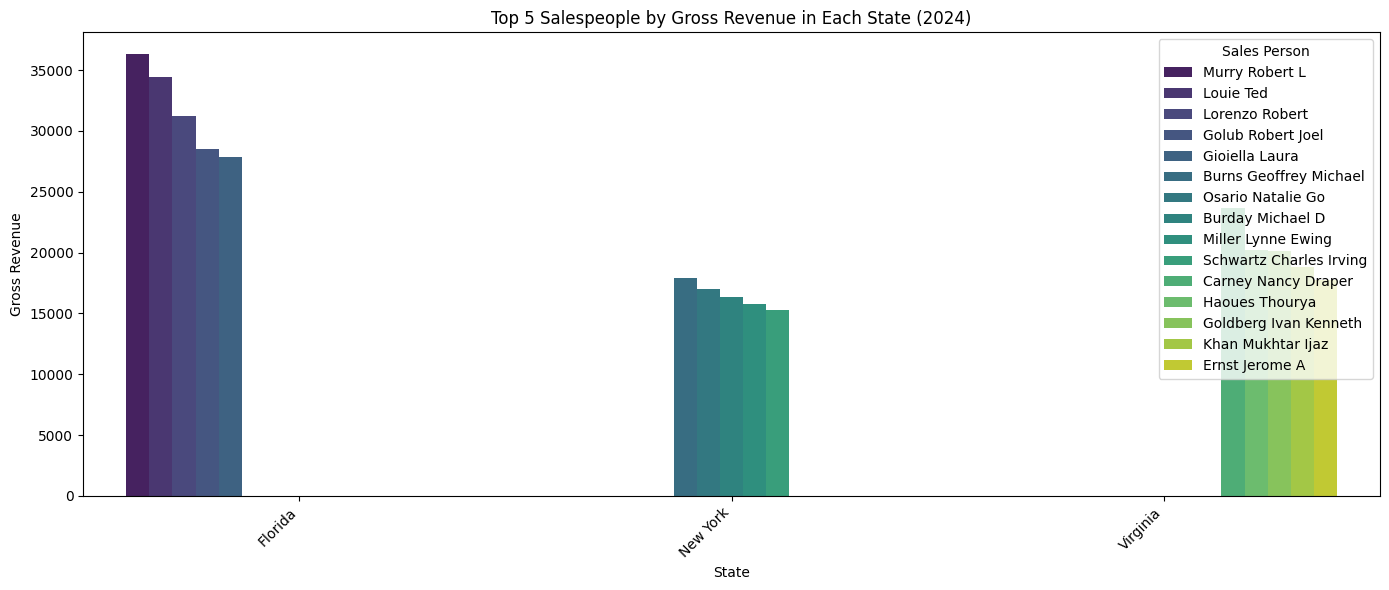

In [ ]:
state_salesp_gross = data_2024_ts.groupby(['State', 'Sales Person'])['Gross revenue'].sum().reset_index()

# Get top 5 salespeople for each state
top_by_state = state_salesp_gross.groupby('State').apply(lambda x: x.nlargest(5, 'Gross revenue')).reset_index(drop=True)

# Create the plot
plt.figure(figsize=(14, 6))  # Adjust figure size as needed
sns.barplot(x='State', y='Gross revenue', hue='Sales Person', data=top_by_state, palette='viridis')
plt.title('Top 5 Salespeople by Gross Revenue in Each State (2024)')
plt.xlabel('State')
plt.ylabel('Gross Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.legend(title='Sales Person', loc='upper right')  # Adjust legend position as needed
plt.tight_layout()
plt.show()

# The names are in Ascending order
# Florida
* Murry Robert L
* Louie Ted
* Lorenzo Robert
* Golub Robert Joel
* Gioiella Laura

# New York
* Bums Geoffrey Michael
* Osario Natalie Go
* Burday Michael D
* Miller Lynne Ewing
* Schwartz Charles Irving

# Virginia
* Camey Nancy Draper
* Haoues Thourya
* Golberg Ivan Kenneth
* Khan Mukhtar Ijaz
* Ernst Jerome A



# Question 5
* Appliances with the most decline in units sold
* For the past 6-months
* 2024 July to 2024 December

In [ ]:
six_md = [ 202407, 202408, 202409, 202410, 202411, 202412]
six_mdf = data_df[data_df['Year-Month'].isin(six_md)]

In [ ]:
six_mdf.head()

,ID,Codeprod,Year-Month,Month No,SalesPersonID,Revenue,UNITS SOLD,Cost of Sales,Year,Gross revenue,Appliance,Brand,Sales Person,Territory,Region,State,Gender,Month
5843,478,193831,202407,7,7,588.5,2,500.225,2024,88.275,Coffee Maker,Samsung,Stoeckle Mark Young,01BD0101,Northeast,Value not found,F,July
5844,479,193832,202407,7,7,588.5,2,470.800,2024,117.700,Coffee Maker,Samsung,Stoeckle Mark Young,01BD0101,Northeast,Value not found,F,July
5845,714,193821,202407,7,10,588.5,2,500.225,2024,88.275,Microwave Oven,Samsung,Mark David Andrew,01BD0101,Northeast,Value not found,M,July
5846,862,193837,202407,7,12,588.5,2,488.455,2024,100.045,Blender,Samsung,Javetz Harold Ira,01BD0102,Northeast,Vermont,M,July
5847,863,193894,202407,7,12,588.5,2,476.685,2024,111.815,Slow Cooker,Whirlpool,Javetz Harold Ira,01BD0102,Northeast,Vermont,M,July


In [ ]:
six_mdf.describe()

,ID,Codeprod,Year-Month,Month No,SalesPersonID,Revenue,UNITS SOLD,Cost of Sales,Year,Gross revenue
count,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.0,10277.000000
mean,20239.211832,193859.514839,202409.514547,9.514547,287.549966,1381.846609,3.935584,866.522633,2024.0,515.323975
std,11646.027005,36.103977,1.743170,1.743170,165.824006,1698.607252,4.619750,1134.406167,0.0,665.486066
min,51.000000,193815.000000,202407.000000,7.000000,1.000000,588.500000,2.000000,149.875000,2024.0,80.080000
25%,10045.000000,193828.000000,202408.000000,8.000000,142.000000,732.600000,2.000000,439.824000,2024.0,247.104000
50%,20326.000000,193859.000000,202410.000000,10.000000,288.000000,976.800000,2.000000,620.928000,2024.0,368.280000
75%,30301.000000,193894.000000,202411.000000,11.000000,430.000000,1478.400000,4.000000,952.380000,2024.0,571.428000
max,40393.000000,193923.000000,202412.000000,12.000000,576.000000,76034.200000,112.000000,51703.256000,2024.0,26183.520000


In [ ]:
six_mdf.describe(include=['object', 'category'])

,Appliance,Brand,Sales Person,Territory,Region,State,Gender,Month
count,10277,10277,10277,10277,10277,10277,10277,10277
unique,16,3,576,66,5,43,2,6
top,Dishwasher,Samsung,Gioiella Laura,01BD0404,Northeast,Florida,F,December
freq,1700,5092,30,296,3302,808,5534,1890


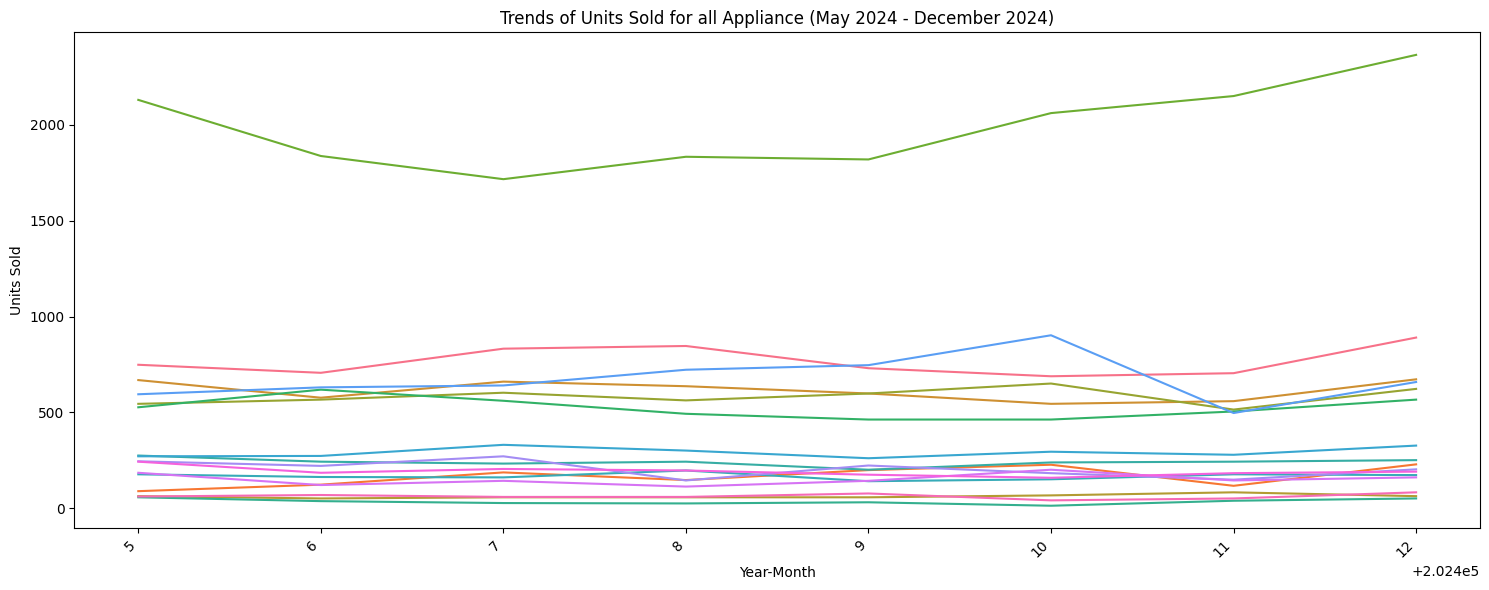

In [ ]:
# Group the data by appliance and year-month and sum the units sold
appliance_sales = six_mdf.groupby(['Appliance', 'Year-Month'])['UNITS SOLD'].sum().reset_index()


plt.figure(figsize=(15, 6))
sns.lineplot(x='Year-Month', y='UNITS SOLD', hue='Appliance', data=appliance_sales)
plt.title('Trends of Units Sold for Each Appliance (July 2024 - December 2024)')
plt.xlabel('Year-Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

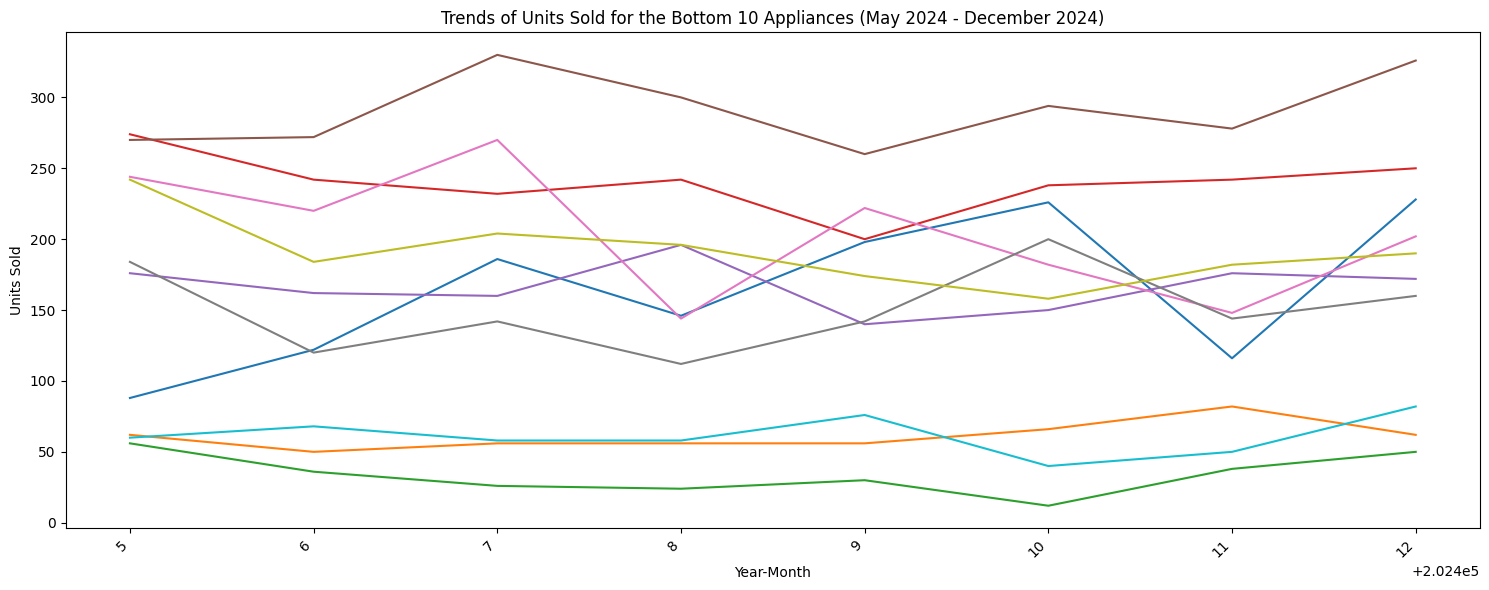

In [ ]:

appliance_s = six_mdf.groupby(['Appliance', 'Year-Month'])['UNITS SOLD'].sum().reset_index()


total_sales_by_appliance = appliance_s.groupby('Appliance')['UNITS SOLD'].sum().reset_index()


bottom_6_appliances = total_sales_by_appliance.sort_values(by=['UNITS SOLD']).head(10)['Appliance'].tolist()

# Filter the appliance_sales data to include only the bottom 6 appliances
filtered_appliance_sales = appliance_s[appliance_s['Appliance'].isin(bottom_6_appliances)]


plt.figure(figsize=(15, 6))
sns.lineplot(x='Year-Month', y='UNITS SOLD', hue='Appliance', data=filtered_appliance_sales)
plt.title('Trends of Units Sold for the Bottom 10 Appliances (May 2024 - December 2024)')
plt.xlabel('Year-Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

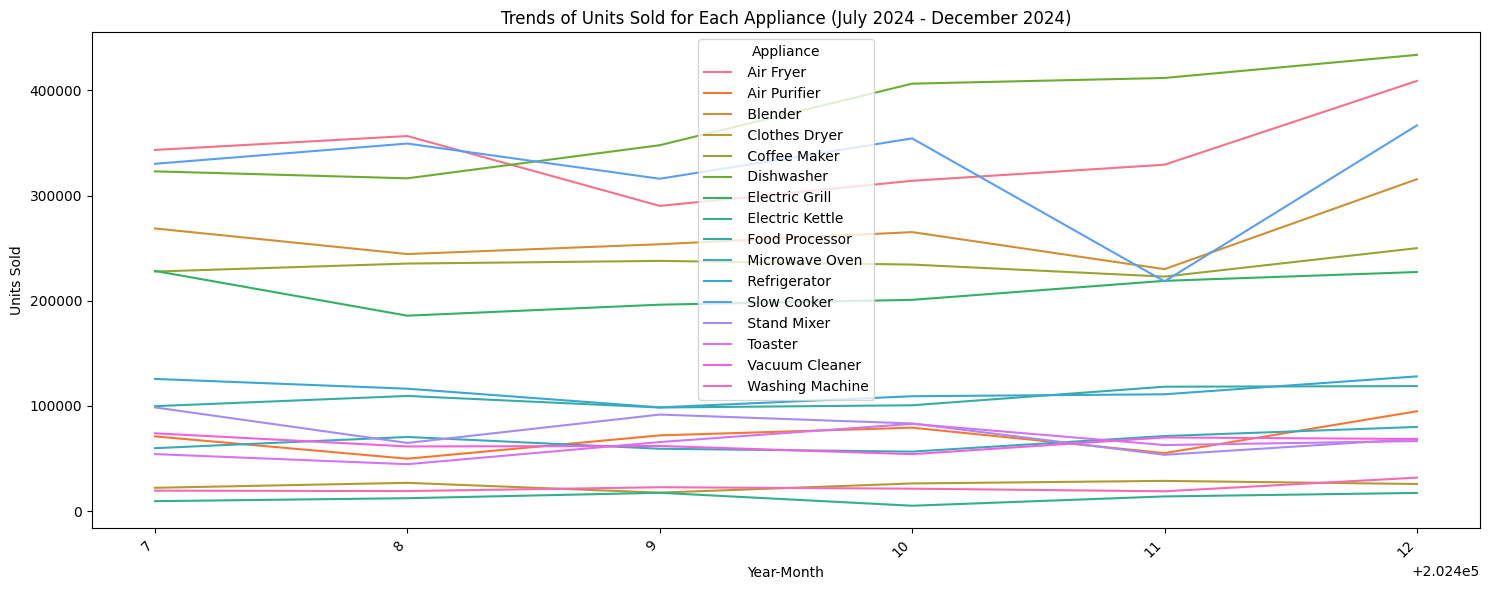

In [ ]:
# Group the data by appliance and year-month and sum the units sold
appliance_sales = six_mdf.groupby(['Appliance', 'Year-Month'])['Revenue'].sum().reset_index()


plt.figure(figsize=(15, 6))
sns.lineplot(x='Year-Month', y='Revenue', hue='Appliance', data=appliance_sales)
plt.title('Trends of Units Sold for Each Appliance (July 2024 - December 2024)')
plt.xlabel('Year-Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()